In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
# The cifar MNIST data is available directly in the tf.keras datasets API

cifar = tf.keras.datasets.cifar10

In [0]:
# load_data will give you two sets of two lists, 
# training and testing values that contain the clothing items and their labels.

(training_images, training_labels) ,  (test_images, test_labels) = cifar.load_data()

In [20]:
# print shape and data type

print(training_images.shape, training_images.dtype)
print(training_labels.shape, training_labels.dtype)
print(test_images.shape, test_images.dtype)
print(test_labels.shape, test_labels.dtype)

(50000, 32, 32, 3) uint8
(50000, 1) uint8
(10000, 32, 32, 3) uint8
(10000, 1) uint8


In [0]:
# labels

# print(training_labels[:10])
# print(test_labels[:10])

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

[3]
cat


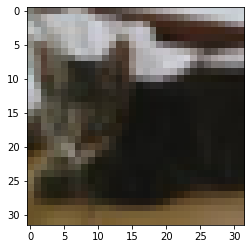

In [23]:
# plot images

plt.imshow(training_images[9])
print(training_labels[9])
print(class_names[int(training_labels[9])])

In [24]:
# For various reasons it's easier if we treat all values as between 0 and 1
# a process called 'normalizing'

training_images = training_images/255.0
test_images = test_images/255.

print(training_images.shape, training_images.dtype)
print(test_images.shape, test_images.dtype)

(50000, 32, 32, 3) float64
(10000, 32, 32, 3) float64


In [0]:
# Sequential: That defines a sequence of layers in the neural network
# Flatten: Flatten just takes multidiamentional array and turns it into a 1D array
# Dense: Adds a layer of neurons

# Activation function: Each layer of neurons need it, to tell them what to do. There's lots of options.
#   Relu means "If X>0 return X, else return 0"
#     so it only passes values 0 or greater to the next layer.
#   Softmax takes a set of values, and effectively picks the biggest one, 
#     if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], 
#     it turns it into [0,0,0,0,1,0,0,0,0]

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [26]:
# Loss function —This measures how accurate the model is during training. 
#   You want to minimize this function to "steer" the model in the right direction.
# Optimizer —This is how the model is updated 
#    based on the data it sees and its loss function.
# Metrics —Used to monitor the training and testing steps. 
#   The following example uses accuracy, the fraction of the images that are correctly classified.

model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [27]:
history = model.fit(training_images, training_labels, epochs=5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 7s 132us/sample - loss: 1.9416 - acc: 0.2958
Epoch 2/5
50000/50000 [==============================] - 6s 126us/sample - loss: 1.8179 - acc: 0.3459
Epoch 3/5
50000/50000 [==============================] - 6s 126us/sample - loss: 1.7805 - acc: 0.3595
Epoch 4/5
50000/50000 [==============================] - 6s 125us/sample - loss: 1.7572 - acc: 0.3652
Epoch 5/5
50000/50000 [==============================] - 6s 126us/sample - loss: 1.7387 - acc: 0.3745


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  393344    
_________________________________________________________________
dense_1 (Dense)              multiple                  1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


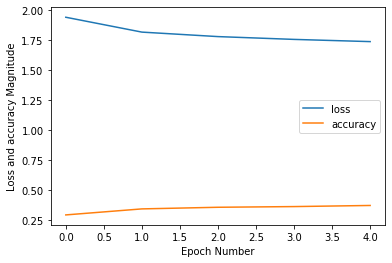

In [29]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss and accuracy Magnitude")
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['acc'], label='accuracy')
plt.legend()
plt.show()

In [30]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 66us/sample - loss: 1.7365 - acc: 0.3738


[1.7364598873138428, 0.3738]

In [0]:
classifications = model.predict(test_images)

[0.09581408 0.0714635  0.07420268 0.2090494  0.0308345  0.24672534
 0.05663777 0.01842901 0.16442937 0.03241429]
[3]


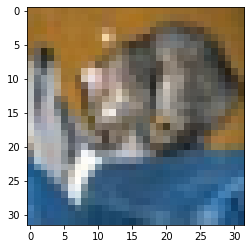

In [32]:
print(classifications[0])
plt.imshow(test_images[0])
print(test_labels[0])
print(class_names[int(training_labels[0])])